<a href="https://colab.research.google.com/github/OumaymaRedissi/Personal-AI-trainer/blob/main/notebooks/Exploratory_Data_Analysis_(videos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Squats classification EDA

## Importing neccessary libraries

In [27]:
import os
import cv2
import matplotlib.pyplot as plt

## Get data from Google Drive

**Mount Drive**



In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Testing**

In [29]:
%cd /content/drive/Othercomputers/PFE/PFE 2023/data/Keypoints_Dataset_V1
%ls

/content/drive/Othercomputers/PFE/PFE 2023/data/Keypoints_Dataset_V1
bad_back_round/  bad_head/         bad_shallow/  good/      train.json
bad_back_warp/   bad_inner_thigh/  bad_toe/      test.json  val.json


**Setup PATHS** 

In [30]:
# Define Path to the Dataset folder
BASE_PATH = '/content/drive/Othercomputers/PFE/PFE 2023/data/Video_Dataset'
SUB_CLASSES = os.listdir(BASE_PATH)
SUB_CLASSES.remove('Readme.md')
print(SUB_CLASSES)



['bad_toe', 'bad_innner_thigh', 'bad_inner_thigh', 'bad_head', 'bad_back_round', 'bad_shallow', 'good', 'bad_back_warp']


In [47]:
# Create a new directory to store the images
IMAGES_PATH = '/content/drive/Othercomputers/PFE/PFE 2023/data/images'
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

## 1.Data inspection

### Number of videos for each type

In [43]:
video_counts = []
for folder_name in SUB_CLASSES:
    folder = os.path.join(BASE_PATH, folder_name)
    video_count = len([file for file in os.listdir(folder) if file.endswith(".mp4")])
    video_counts.append(video_count)

/content/drive/Othercomputers/PFE/PFE 2023/data/images/Number of Videos for Each Type.png


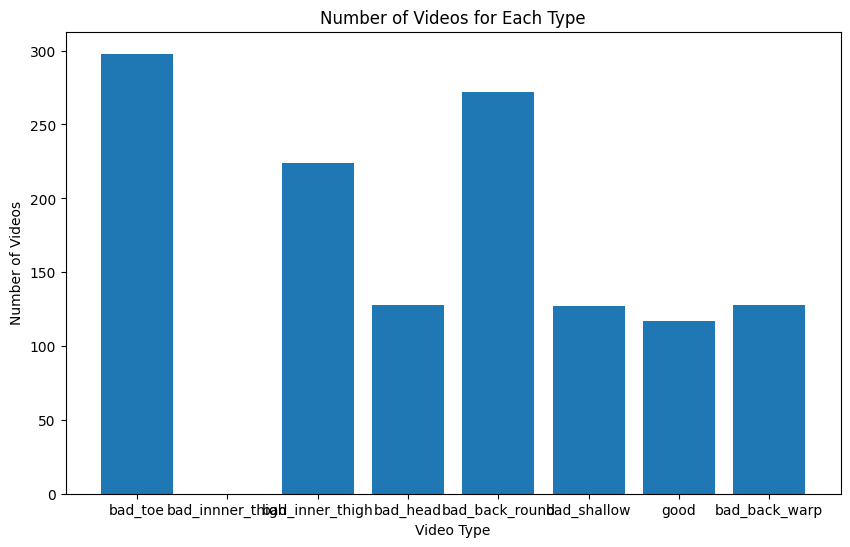

Total number of videos: 1294


In [45]:
# Create a bar chart to visualize the video counts
fig, ax = plt.subplots(figsize=(10, 6)) # set the figsize parameter to make the figure wider
plt.bar(SUB_CLASSES, video_counts)
plt.title("Number of Videos for Each Type")
plt.xlabel("Video Type")
plt.ylabel("Number of Videos")

# Save the plot in the images folder with a specific filename
filename = 'Number of Videos for Each Type.png'
filepath = os.path.join(IMAGES_PATH, filename)
print(filepath)
plt.savefig(filepath)
plt.show()

print("Total number of videos:",sum(video_counts))

### Distribution of video lengths (frames)

In [33]:
video_lengths = {}
for folder_name in SUB_CLASSES:
    folder = os.path.join(BASE_PATH, folder_name)
    video_lengths[folder_name] = []
    for video_file in os.listdir(folder):
        if video_file.endswith(".mp4"):
            video_path = os.path.join(folder, video_file)
            try:
                cap = cv2.VideoCapture(video_path)
                length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                video_lengths[folder_name].append(length)
                #print(f"Video {video_file} in folder {folder_name} has {length} frames")
                cap.release()
            except:
                print(f"Could not read video file: {video_path}")


/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_toe video lengths distribution.png


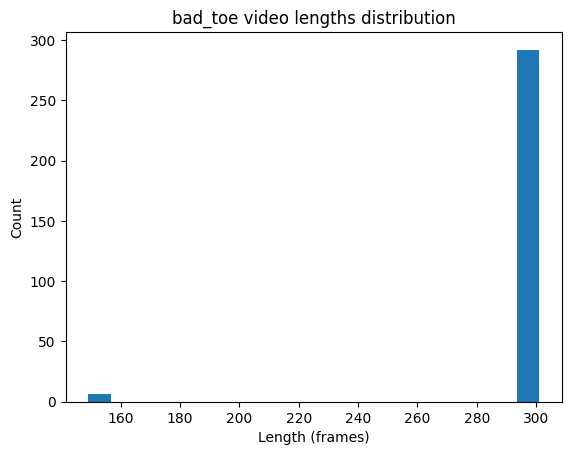

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_innner_thigh video lengths distribution.png


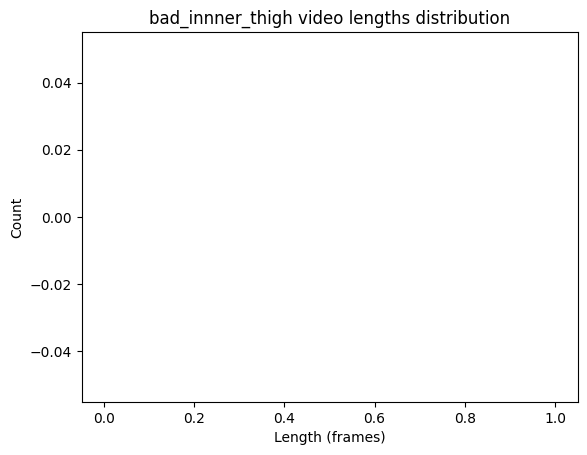

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_inner_thigh video lengths distribution.png


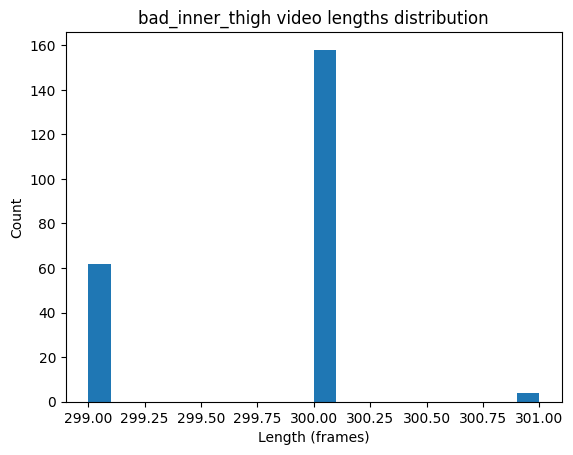

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_head video lengths distribution.png


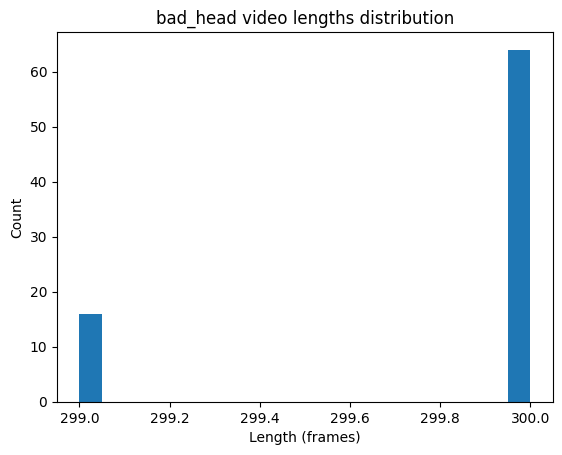

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_back_round video lengths distribution.png


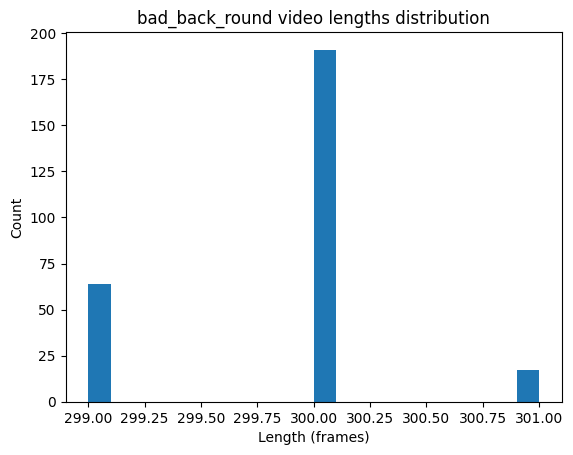

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_shallow video lengths distribution.png


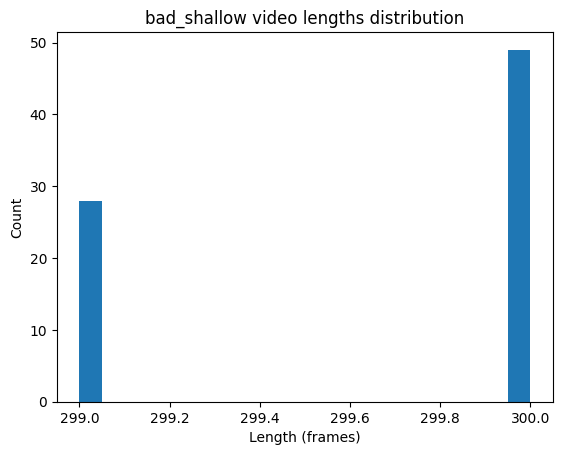

/content/drive/Othercomputers/PFE/PFE 2023/data/images/good video lengths distribution.png


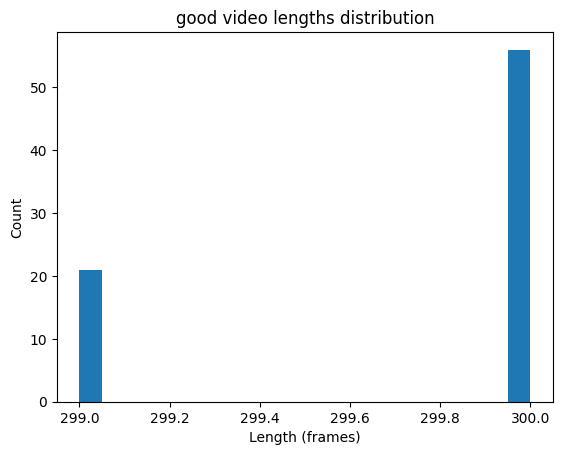

/content/drive/Othercomputers/PFE/PFE 2023/data/images/bad_back_warp video lengths distribution.png


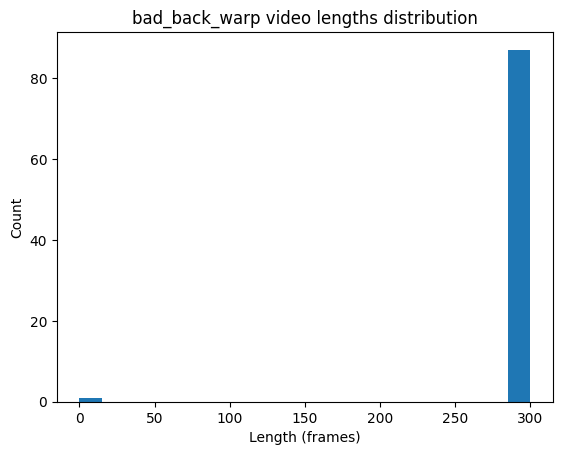

In [48]:
for folder, lengths in video_lengths.items():
    plt.hist(lengths, bins=20)
    plt.title(f"{folder} video lengths distribution")
    plt.xlabel("Length (frames)")
    plt.ylabel("Count")

    # Save the plot in the images folder with a specific filename
    filename = f"{folder} video lengths distribution.png"
    filepath = os.path.join(IMAGES_PATH, filename)
    print(filepath)
    plt.savefig(filepath)
    plt.show()
    

In [35]:
lengths = []
for folder_name in video_lengths.keys():
    lengths += video_lengths[folder_name]

/content/drive/Othercomputers/PFE/PFE 2023/data/images/Distribution of Video Lengths.png


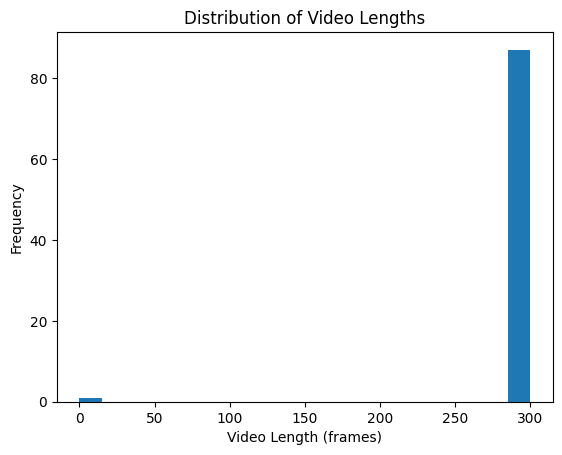

In [49]:
# plot a histogram of the video lengths
plt.hist(lengths, bins=20)
plt.xlabel("Video Length (frames)")
plt.ylabel("Frequency")
plt.title("Distribution of Video Lengths")

# Save the plot in the images folder with a specific filename
filename = "Distribution of Video Lengths.png"
filepath = os.path.join(IMAGES_PATH, filename)
print(filepath)
plt.savefig(filepath)
plt.show()

### Distribution of videos resolution

In [50]:
resolutions = []

# loop over each video in folder
for folder_name in SUB_CLASSES:
    folder = os.path.join(BASE_PATH, folder_name)
    for video_file in os.listdir(folder):
        video_path = os.path.join(folder, video_file)
        cap = cv2.VideoCapture(video_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        resolutions.append((width, height))
        cap.release()
# extract width and height into separate lists
widths, heights = zip(*resolutions)

/content/drive/Othercomputers/PFE/PFE 2023/data/images/Distribution of Video Resolutions.png


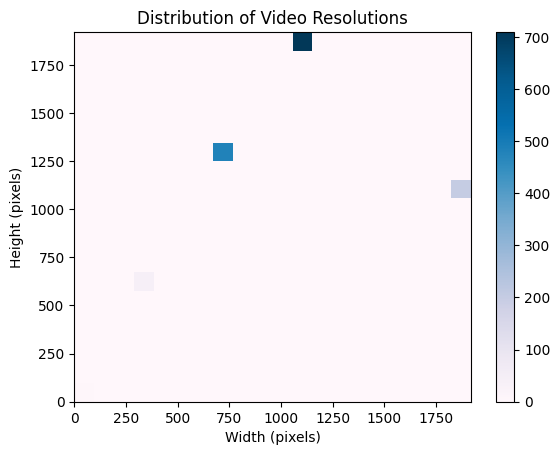

In [51]:
# plot a histogram of the video resolutions
plt.hist2d(widths, heights, bins=(20, 20), cmap=plt.cm.PuBu)
plt.colorbar()
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Distribution of Video Resolutions")

# Save the plot in the images folder with a specific filename
filename = "Distribution of Video Resolutions.png"
filepath = os.path.join(IMAGES_PATH, filename)
print(filepath)
plt.savefig(filepath)
plt.show()